In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import os
import sys 
sys.path.append("../src")
from Fitness.AED import Calculate_AED



In [2]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    input = yaml.load(f)
Name_Folder = "0D_LUC"
flag_output= True

species = [species for species, values in input.items() if values["AED"] == 1]


data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_a = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_140_AED.csv")
data_b = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_140_AEDML.csv")
data_c = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_140_ORCH.csv")

case = data_d["P_Init"].nunique()*  data_d["T_Init"].nunique()  *  data_d["Phi_Init"].nunique()  *  data_d["Mixt_Init"].nunique() 
lenght= int(data_d.shape[0]/ case)

In [3]:
EAD_ML_R_TOT,EAD_ML_R  = Calculate_AED(data_d,data_r,input,flag_output) 
EAD_ML_A_TOT,EAD_ML_A  = Calculate_AED(data_d,data_a,input,flag_output) 
EAD_ML_B_TOT,EAD_ML_B  = Calculate_AED(data_d,data_b,input,flag_output) 
EAD_ML_C_TOT,EAD_ML_C  = Calculate_AED(data_d,data_c,input,flag_output) 


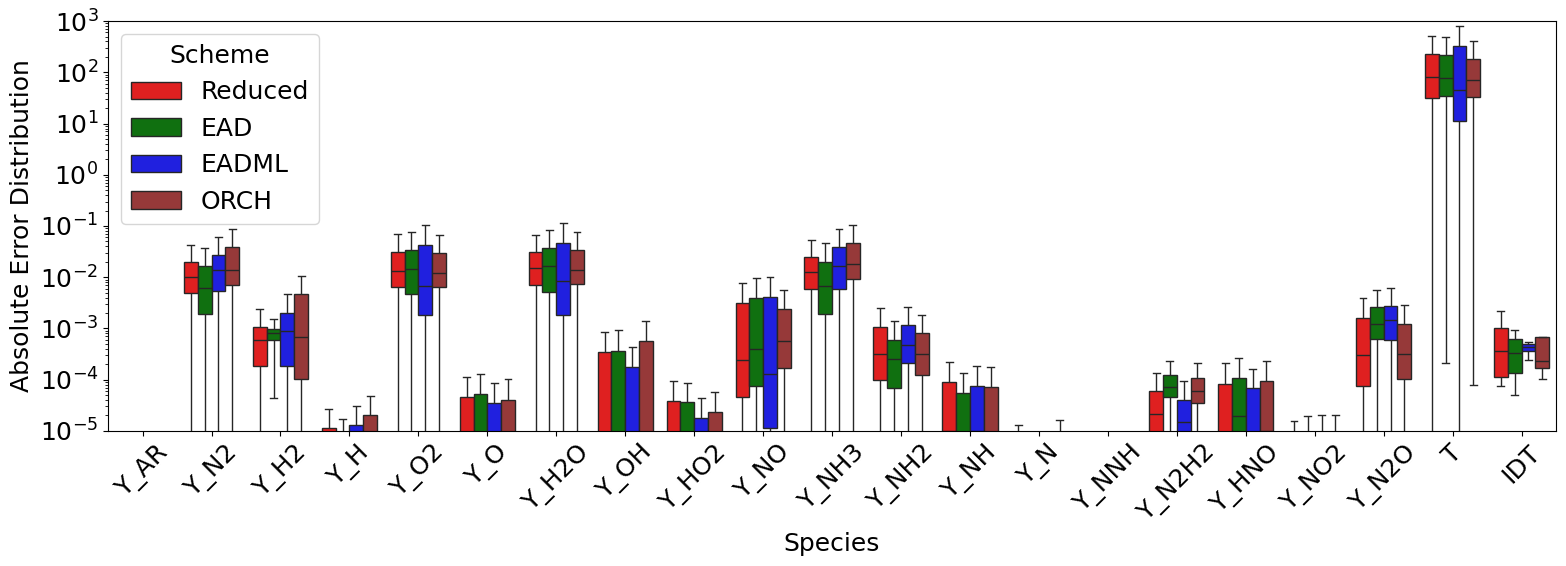

In [7]:
df_reduced = EAD_ML_R.melt(var_name="Species", value_name="Absolute Error Distribution")
df_reduced["Scheme"] = "Reduced"

df_optimA = EAD_ML_A.melt(var_name="Species", value_name="Absolute Error Distribution")
df_optimA["Scheme"] = "EAD"

df_optimB = EAD_ML_B.melt(var_name="Species", value_name="Absolute Error Distribution")
df_optimB["Scheme"] = "EADML"


df_optimC = EAD_ML_C.melt(var_name="Species", value_name="Absolute Error Distribution")
df_optimC["Scheme"] = "ORCH"

# Fusionner les deux
df_all = pd.concat([df_reduced, df_optimA,df_optimB,df_optimC], ignore_index=True)

palette = {"Reduced": "red", "EAD": "green","EADML" : "blue","ORCH" : "brown"}

# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Absolute Error Distribution", hue="Scheme",  palette=palette,showfliers=False)
plt.yscale("log")
plt.ylim([1e-5, 1e3])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("AED_SPECIES.png")



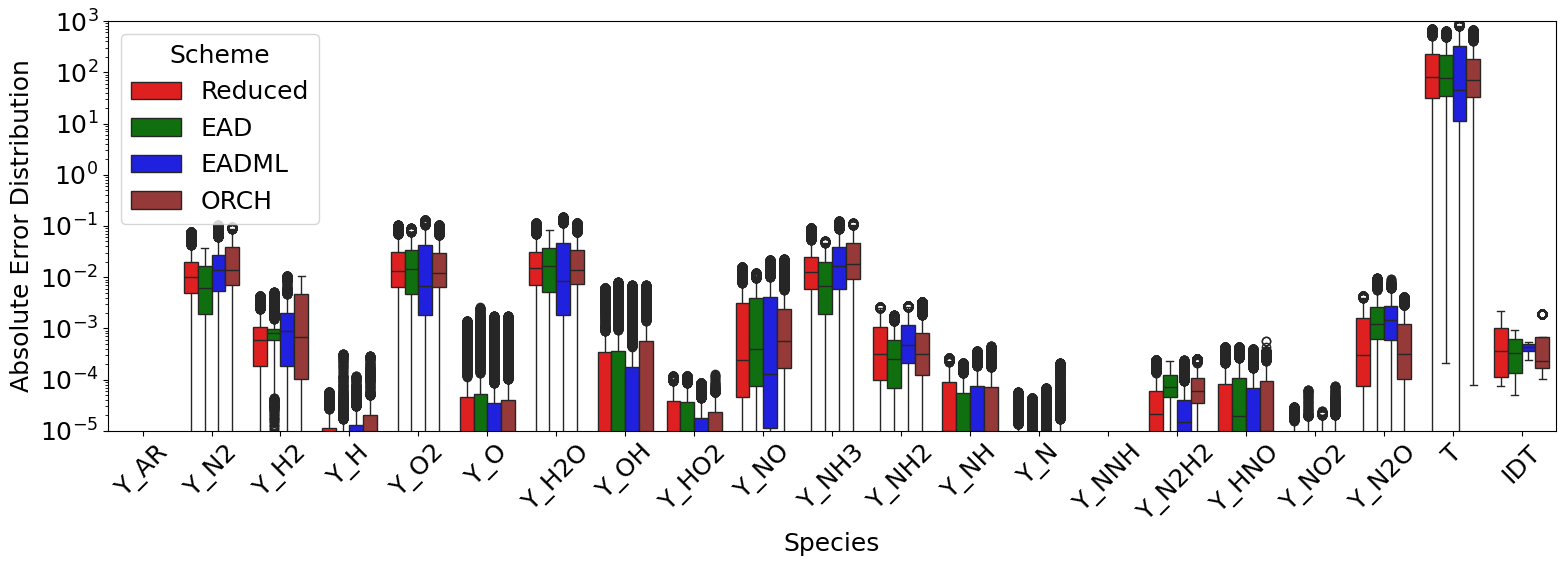

In [8]:
# Tracer
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 18})
sns.boxplot(data=df_all, x="Species", y="Absolute Error Distribution", hue="Scheme",  palette=palette,showfliers=True)
plt.yscale("log")
plt.ylim([1e-5, 1e3])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("AED_SPECIES_showfliers.png")



In [15]:
Tot_R = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_A = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_B = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
Tot_C = pd.DataFrame(0.0, index=range(case), columns=EAD_ML_R.columns)
for c in range(case): 
    loc_err_reduced = EAD_ML_R.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimA = EAD_ML_A.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimB = EAD_ML_B.iloc[c*lenght:c*lenght+lenght]
    loc_err_optimC = EAD_ML_C.iloc[c*lenght:c*lenght+lenght]
    for s in EAD_ML_R.columns : 
        Tot_R.at[c, s] =  loc_err_reduced[s].sum()
        Tot_A.at[c, s] = loc_err_optimA[s].sum()
        Tot_B.at[c, s] = loc_err_optimB[s].sum()
        Tot_C.at[c, s] = loc_err_optimC[s].sum()

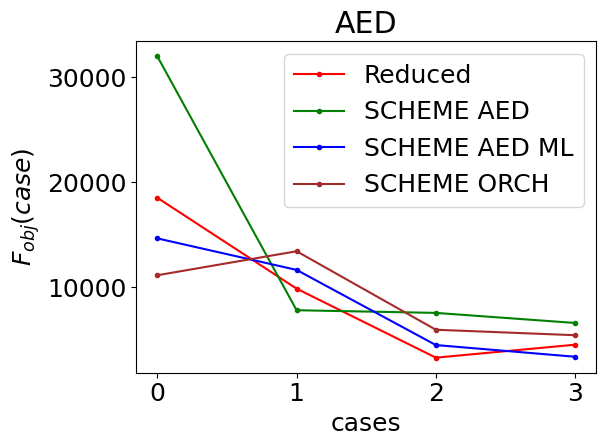

In [20]:
plt.plot(Tot_R.sum(axis=1),"r.-",label="Reduced")
plt.plot(Tot_A.sum(axis=1),"g.-",label="SCHEME AED")
plt.plot(Tot_B.sum(axis=1),"b.-",label="SCHEME AED ML")
plt.plot(Tot_C.sum(axis=1),".-",color="brown",label="SCHEME ORCH")
plt.ylabel(r"$F_{obj}(case)$")
plt.xlabel("cases")
# plt.yscale("log")
plt.legend()
plt.title("AED")
plt.tight_layout()
